The goal of the 2022 Challenge is to discriminate life-threatening VAs (i.e., Ventricular Fibrillation and Ventricular Tachycardia) from single-lead (RVA-Bi) IEGM recordings. 

https://tinymlcontest.github.io/TinyML-Design-Contest/Problems.html
https://github.com/tinymlcontest/tinymlcontest2022_demo_example/blob/master/label_list.csv

VT, VFb, VFt = VA

AFb, AFt, SR, SVT,VPD = non VA

In [1]:
import os
import random
#import pandas as pd
from random import randint
import numpy as np
import matplotlib.pyplot as plt
import pywt
from tqdm import tqdm

In [2]:
BAD = ['VT', 'VFb', 'VFt']
dir_path = r'C:\Users\jodge\Documents\School\Summer24\tinyml_contest_data_training'
directory_files = os.listdir(dir_path)

In [3]:
def outliers():
    low = 1
    high = -1
    checkThese = []
    for f in directory_files[:]:
        file_path = os.path.join(dir_path, f)
        df = np.loadtxt(file_path)
        tempLow = float(df.min())
        tempHigh = float(df.max())
        if tempLow <= -2 or tempHigh >= 2:
            checkThese.append(f)
        low = min(low, tempLow)
        high = max(high, tempHigh)
        #print(df.head(5))
    print(low, high, len(checkThese))
    np.savetxt("outliers.csv",
            checkThese,
            delimiter =",",
            fmt ='% s')
    
def getRandomSignal():
    idx = random.randint(0, len(directory_files))
    file_name = directory_files[idx]
    file_path = os.path.join(dir_path, file_name)
    cat = file_name.split('-')[1]
    
    data = np.loadtxt(file_path)
    return data, cat

def getStyle(file_name):
    return'b-' if file_name.split('-')[1] not in BAD else 'r-'

### data ranges in total from [-2.4875518 to 2.296531]

In [5]:
# for _ in range(10):
#     #test = directory_files[random.randint(0, 500)]
#     test = checkThese[random.randint(0, len(checkThese))]
#     test_path = os.path.join(dir_path, test)
#     #df = pd.read_csv(test_path, sep=" ", header=None)
#     data = np.loadtxt(test_path)
    
#     print(float(data.max()), float(data.min()))
#     if any(w in test for w in BAD):
#         print("VA!!!")
#         col = 'r'
#     else:
#         print("safe")
#         col = 'b'
    
#     plt.plot(df, color=col)
#     plt.title(test)
#     plt.show()

In [6]:
#from scipy.optimize import minimize
#from scipy.fftpack import dct, idct

def plotPairSignals(x1, x2, title1 = 'og', title2 = 'recon', style = 'b-'):
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12,5))
    #n = len(x1)
    #t = np.linspace(0, 5, n)
    ax1.plot(x1, style)
    ax1.set_title(title1)
    ax2.plot(x2, style)
    ax2.set_title(title2)
    plt.tight_layout()
    plt.show()

def plotThreeSignals(x1, x2, x3, title1 = 'og', title2 = 'fft', title3 = 'ifft', style = 'b-'):
    fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(12,3))
    #n = len(x1)
    #t = np.linspace(0, 5, n)
    ax1.plot(x1, style)
    ax1.set_title(title1)
    ax2.plot(x2, style)
    ax2.set_title(title2)
    ax3.plot(x3, style)
    ax3.set_title(title3)
    plt.tight_layout()
    plt.show()

[ 82  99  98 100 115 131 101 120 119 181]


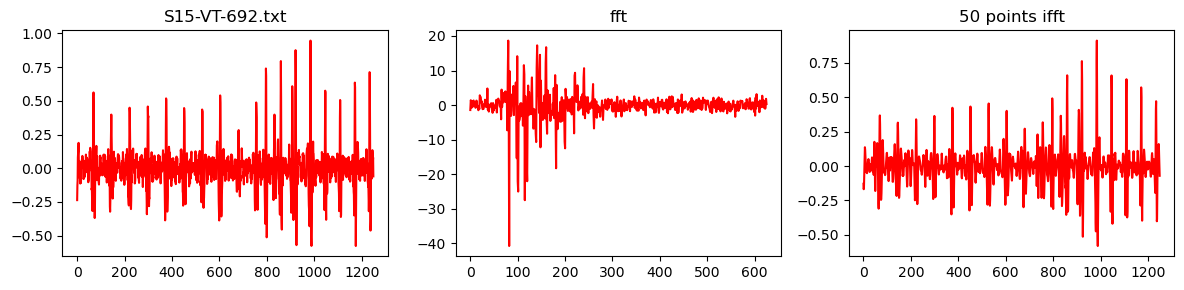

[ 90  96  92  86 102 108  98  84 114 119]


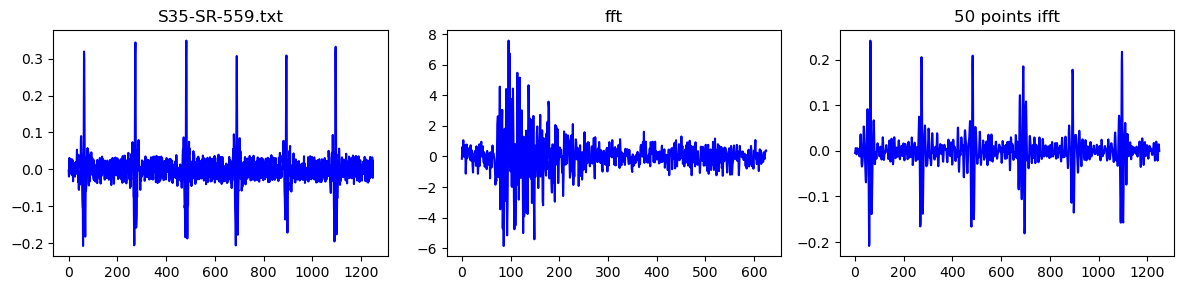

In [24]:
for _ in range(2):
    idx = random.randint(0, len(directory_files))
    file_name = directory_files[idx]
    file_path = os.path.join(dir_path, file_name)
    
    x1 = np.loadtxt(file_path)
    n = len(x1)
    x2 = np.fft.rfft(x1)
    m = len(x2)
    x3 = np.fft.irfft(x2)

    biggest = np.argsort(np.abs(x2))[::-1]
    print(biggest[:10])
    ranks = 50
    mask = np.zeros_like(x2, dtype=bool)
    mask[biggest[:ranks]] = True
    x4 = np.where(mask, x2, 0)    

    x5 = np.fft.irfft(x4)
    
    style0 = 'b-' if file_name.split('-')[1] not in BAD else 'r-'
    plotThreeSignals(x1, x2, x5,file_name, title3=f'{ranks} points ifft', style = style0)

Frequency range: 0.0 to 125.0 Hz


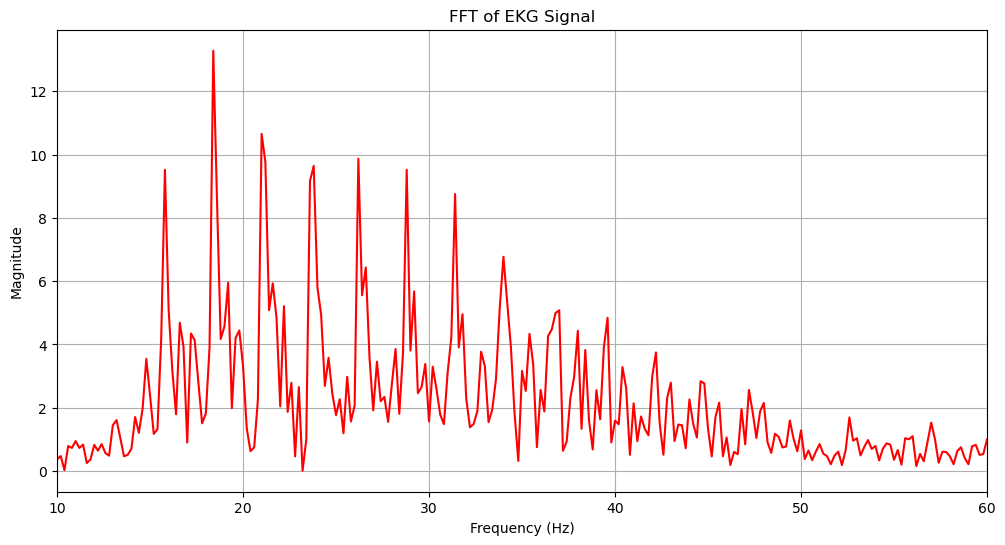

Frequency range: 0.0 to 125.0 Hz


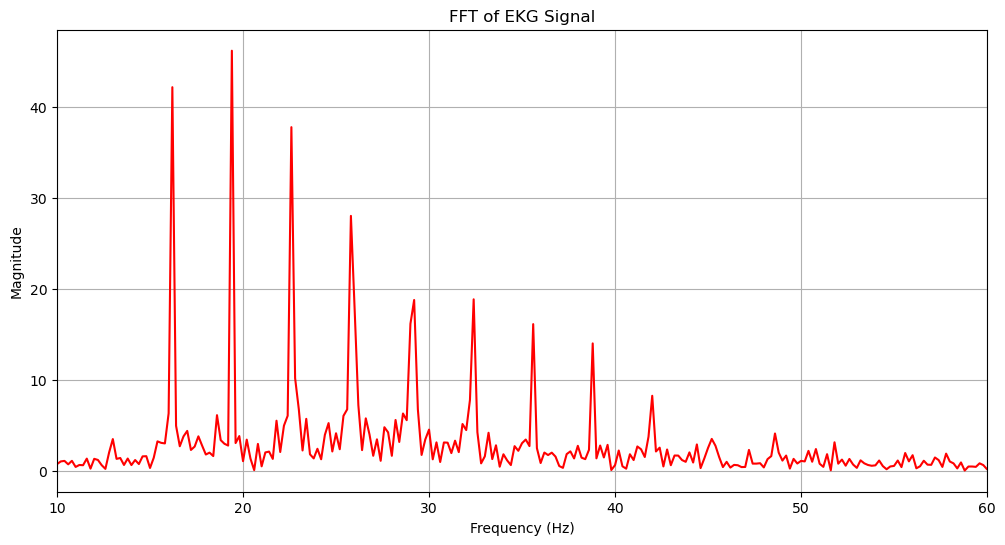

Frequency range: 0.0 to 125.0 Hz


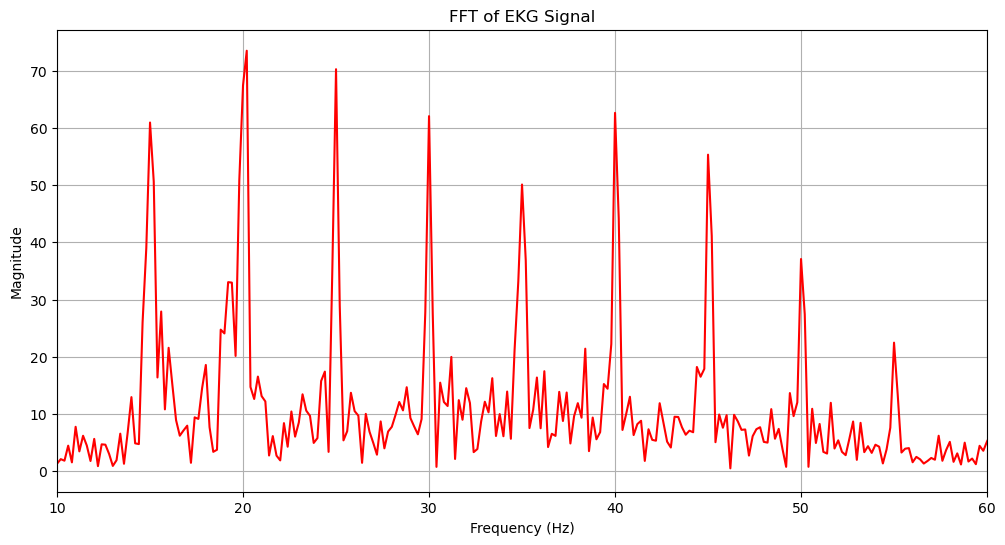

Frequency range: 0.0 to 125.0 Hz


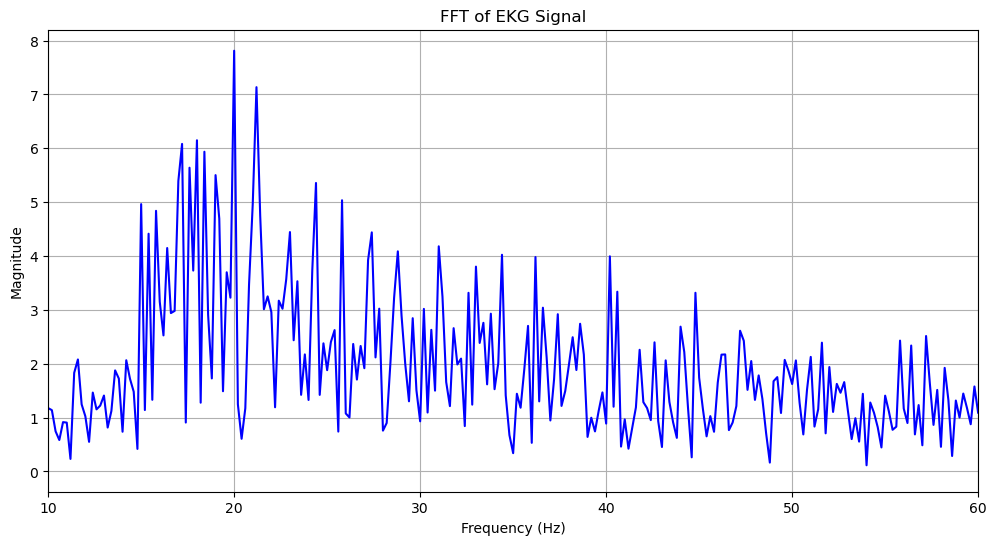

Frequency range: 0.0 to 125.0 Hz


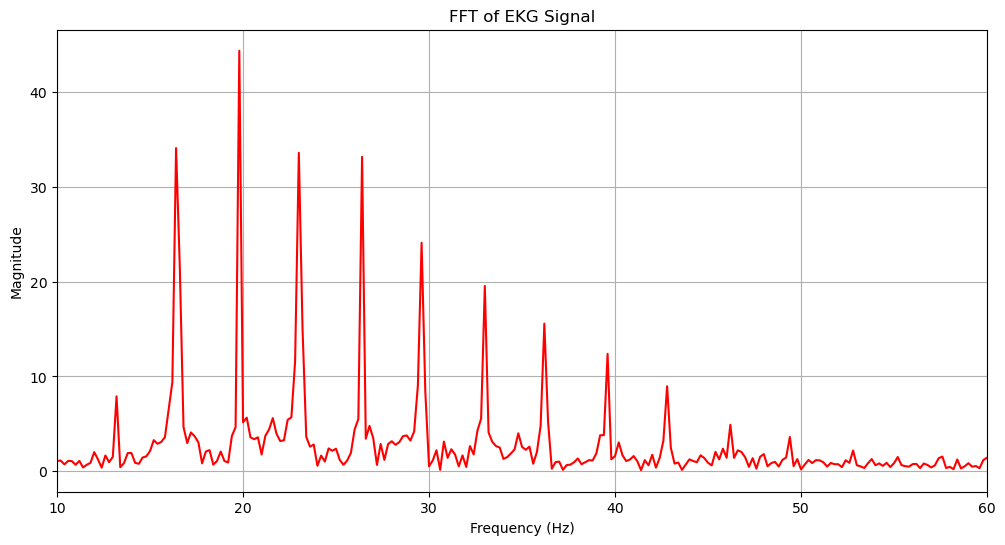

Frequency range: 0.0 to 125.0 Hz


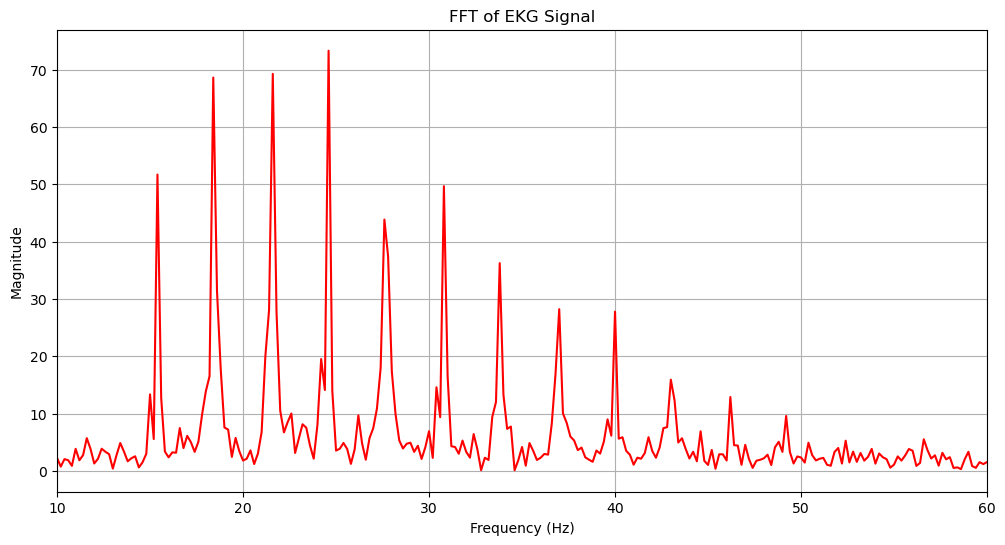

Frequency range: 0.0 to 125.0 Hz


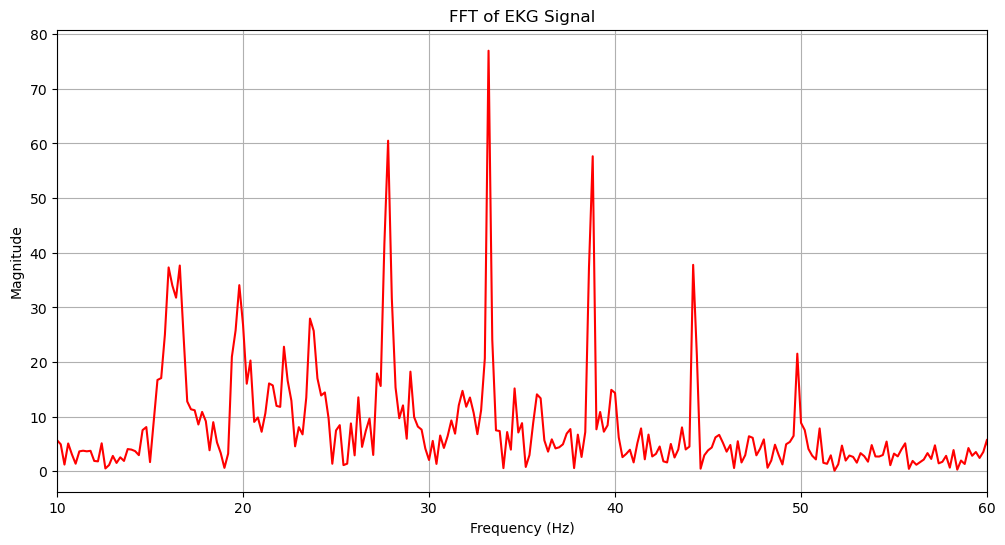

Frequency range: 0.0 to 125.0 Hz


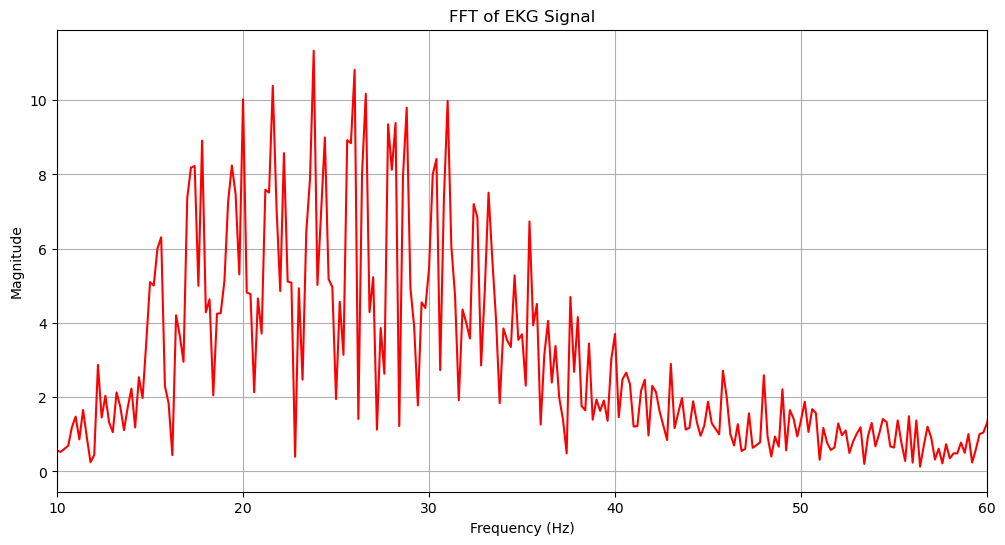

Frequency range: 0.0 to 125.0 Hz


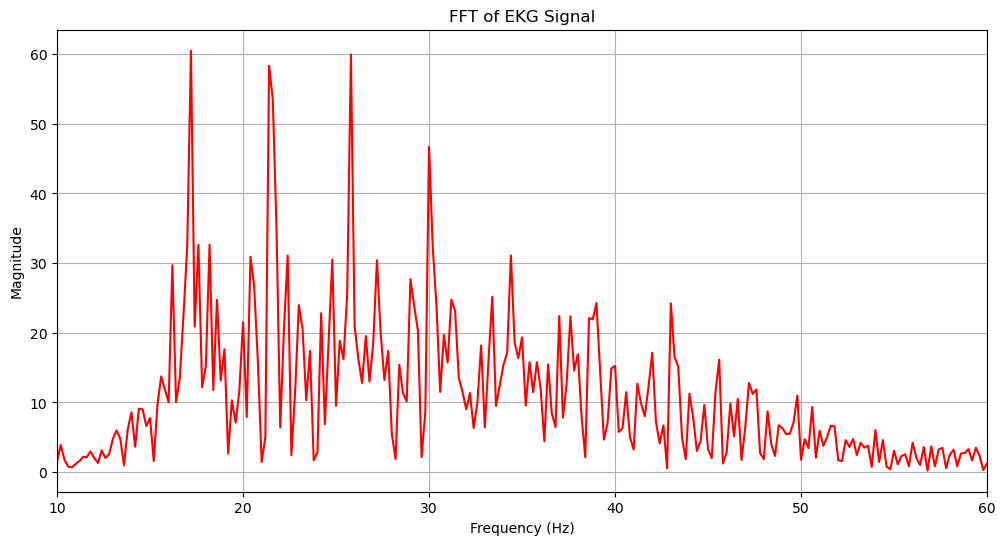

Frequency range: 0.0 to 125.0 Hz


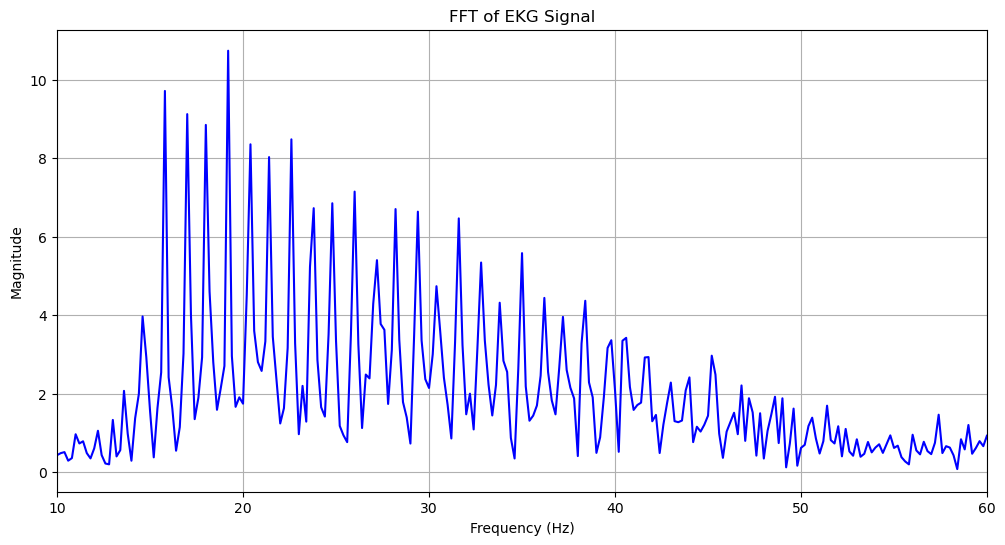

Frequency range: 0.0 to 125.0 Hz


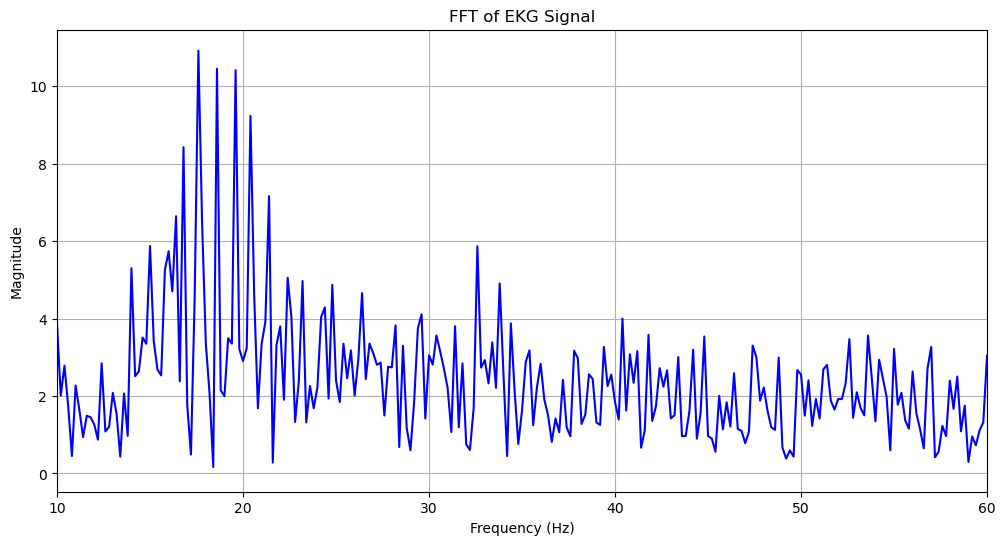

Frequency range: 0.0 to 125.0 Hz


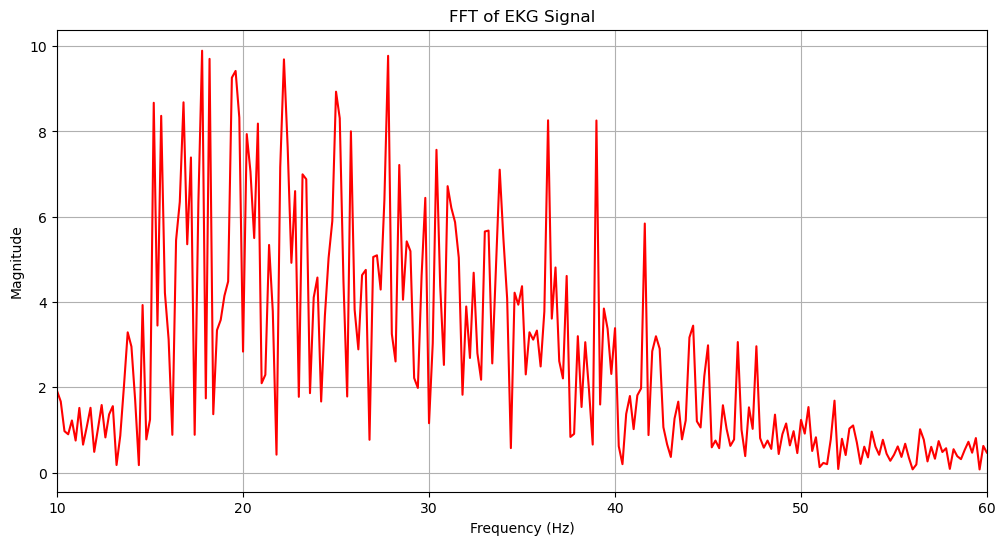

Frequency range: 0.0 to 125.0 Hz


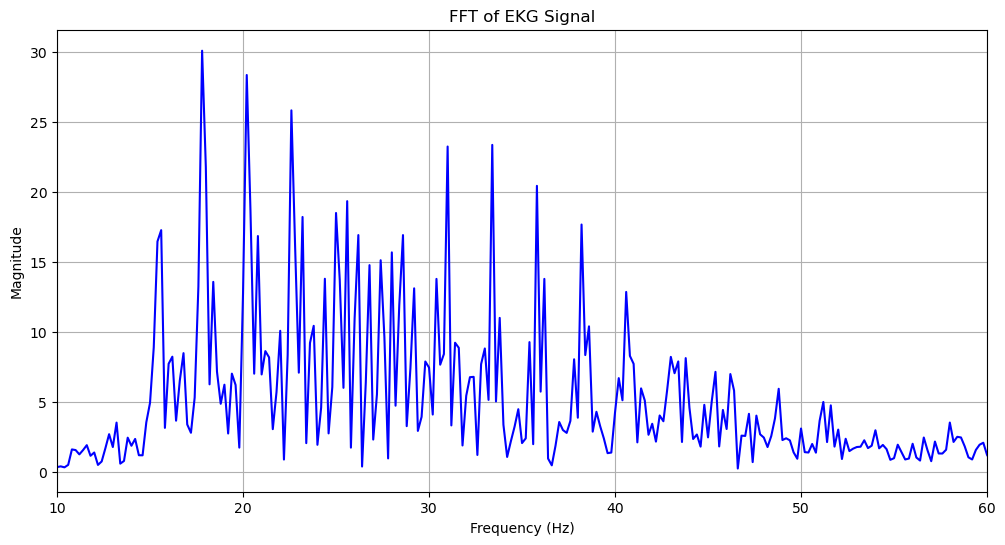

Frequency range: 0.0 to 125.0 Hz


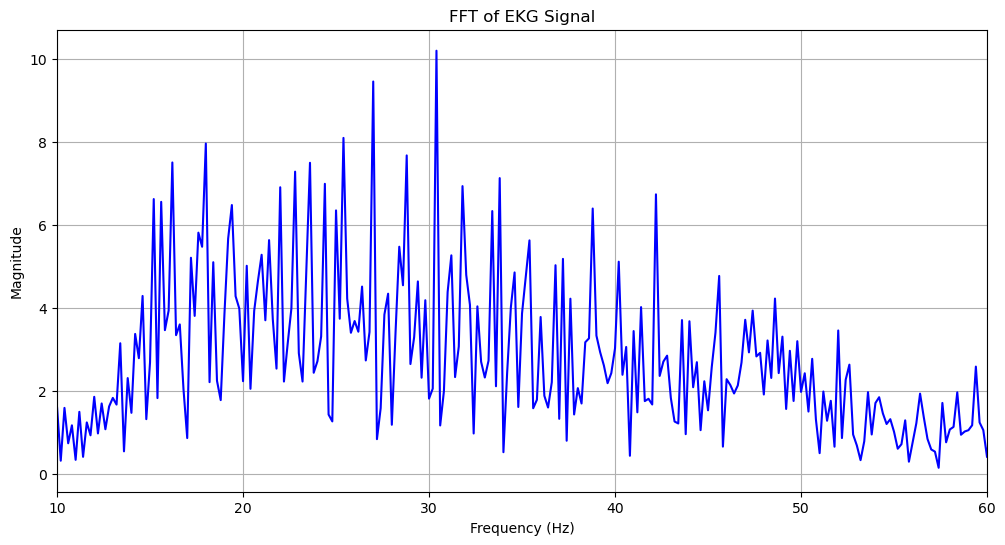

Frequency range: 0.0 to 125.0 Hz


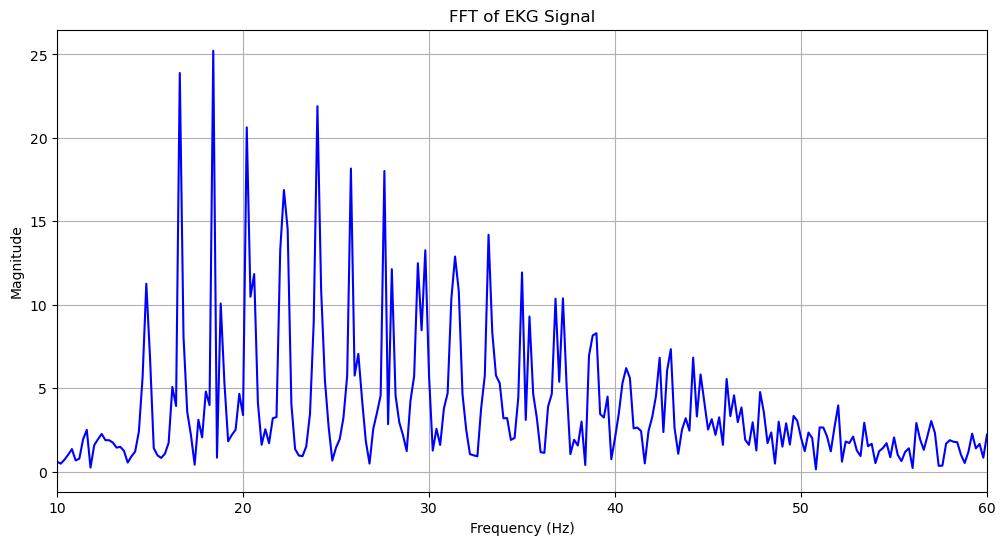

Frequency range: 0.0 to 125.0 Hz


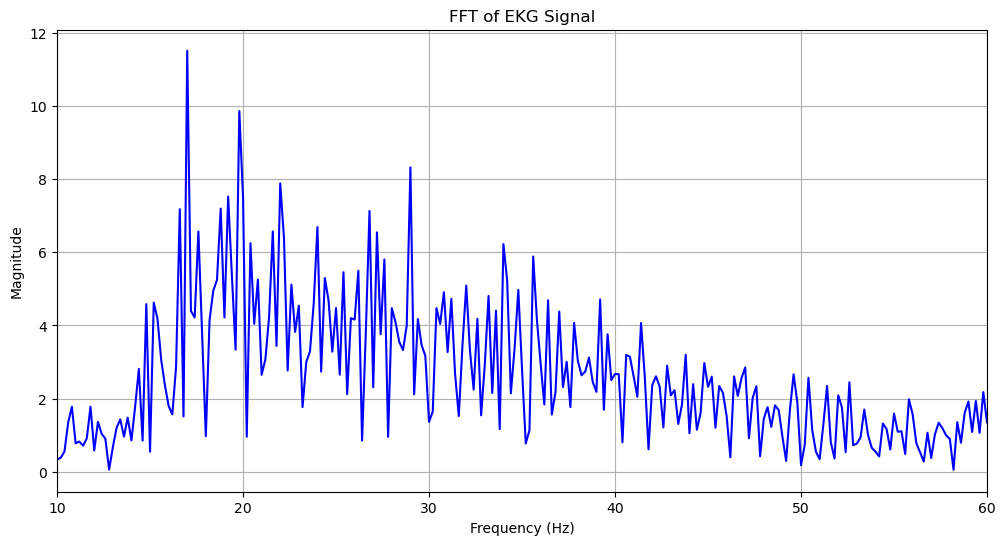

Frequency range: 0.0 to 125.0 Hz


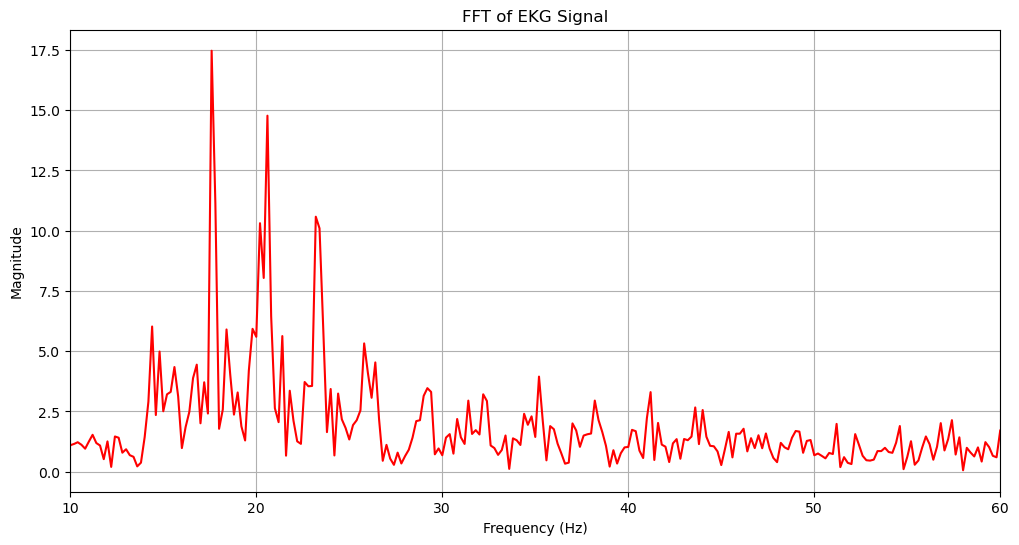

Frequency range: 0.0 to 125.0 Hz


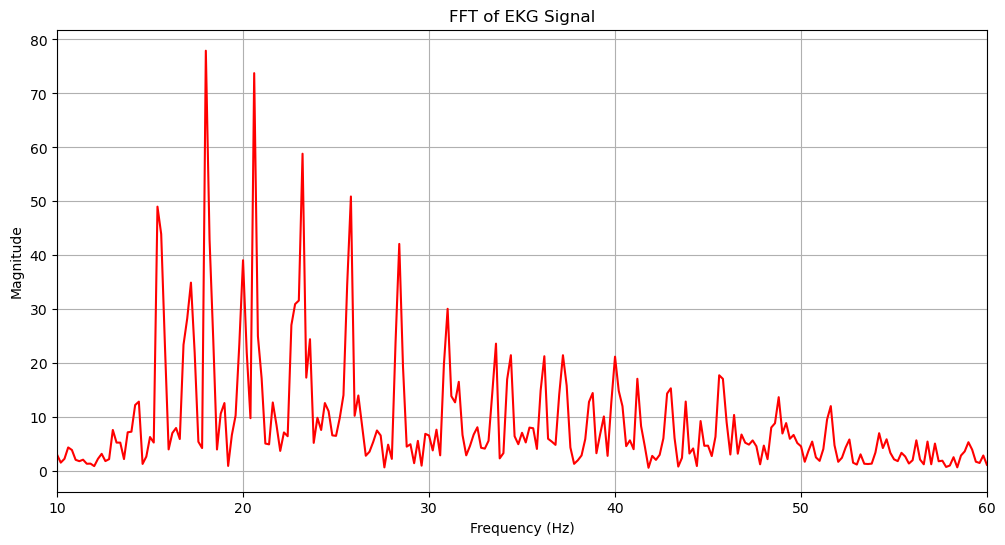

Frequency range: 0.0 to 125.0 Hz


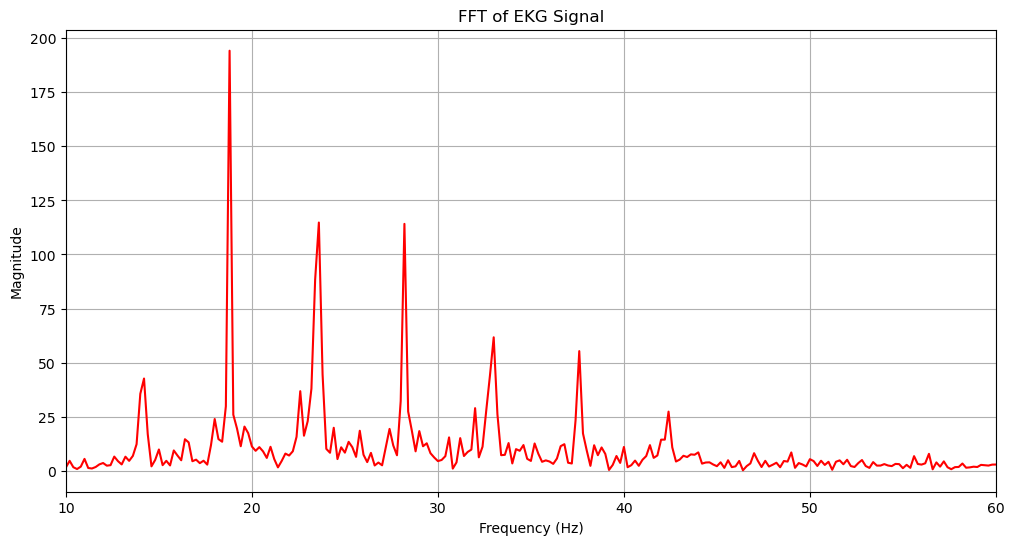

Frequency range: 0.0 to 125.0 Hz


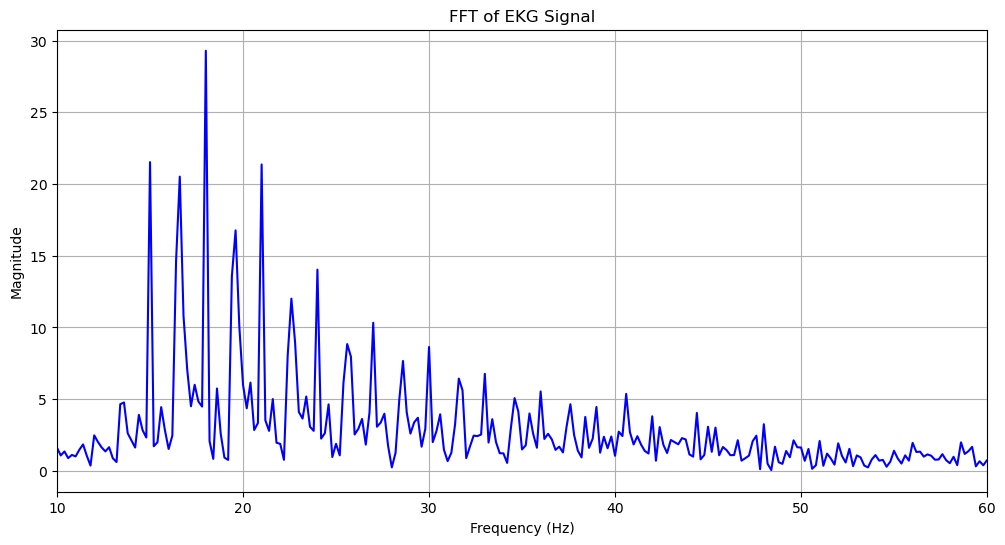

In [34]:
for _ in range(20):
    idx = random.randint(0, len(directory_files))
    file_name = directory_files[idx]
    file_path = os.path.join(dir_path, file_name)
    
    x1 = np.loadtxt(file_path)

    fft_result = np.fft.rfft(x1)

    N = 1250
    sample_rate = 250
    frequencies = np.fft.rfftfreq(N, d=1/sample_rate)
    print(f"Frequency range: {frequencies[0]} to {frequencies[-1]} Hz")
    
    style0 = 'b-' if file_name.split('-')[1] not in BAD else 'r-'
    
    
    plt.figure(figsize=(12, 6))
    plt.plot(frequencies, np.abs(fft_result), getStyle(file_name))
    plt.xlabel('Frequency (Hz)')
    plt.ylabel('Magnitude')
    plt.title('FFT of EKG Signal')
    plt.xlim(10, 60)  # Focus on the 0-60 Hz range
    plt.grid(True)
    plt.show()

# Wavelet - Claude Assisted

In [32]:
def sparse_wavelet(signal, wavelet='db4', level=5, threshold_percentage=10, trunc = False):
    # Perform wavelet decomposition
    coeffs = pywt.wavedec(signal, wavelet, level=level) #  'sym4', 'coif4'
    
    # Threshold determination
    max_coeff = max(np.max(np.abs(c)) for c in coeffs)
    threshold = threshold_percentage / 100.0 * max_coeff
    
    # Thresholding
    for i in range(1, len(coeffs)):
        coeffs[i] = pywt.threshold(coeffs[i], threshold, mode='hard')

    # Reconstruct the signal
    reconstructed = pywt.waverec(coeffs, wavelet)
    
    return coeffs, reconstructed



In [33]:
def analyze_sparsity(coeffs):
    total_coeffs = sum(len(c) for c in coeffs)
    non_zero_coeffs = sum(np.count_nonzero(c) for c in coeffs)
    sparsity = 1 - (non_zero_coeffs / total_coeffs)
    print(f"Sparsity: {sparsity:.2%}")
    print(f"Non-zero coefficients: {non_zero_coeffs} out of {total_coeffs}")
    print(f"This CLAUDE function is basically useless.")
#analyze_sparsity(coeffs)

### my funcs

In [10]:
def plotWaveletDecomp(coeffs, style = 'b-'):
    fig, axs  = plt.subplots(2, 3, figsize=(12,6))
    for r in range(2):
        for c in range(3):
            idx = r*3 + c
            axs[r,c].plot(coeffs[idx])
            axs[r,c].set_title(f'{idx}')
    plt.show()

def waveletMaskCounter(w = 'db4', m='zero', l=5):
    counts = [0]*6
    #ri = randint(0,len(directory_files)-5) #ri:ri+5
    for fi in tqdm(directory_files, desc='Wavelet Mask'):
        x1 = np.loadtxt(os.path.join(dir_path,fi))
        #plt.plot(x1)
        #plt.show()
        
        coeffs = pywt.wavedec(x1, w, mode=m, level = l)
        #plotWaveletDecomp(coeffs)
        largest_range = 0
        idx = 0
        for i,c in enumerate(coeffs):
            #plt.plot(c)
            #plt.title(str(i))
            #plt.show()
            pos = np.max(c)
            neg = np.min(c)
            myrange = pos - neg
            #print(i,myrange)
            if myrange > largest_range:
                largest_range = myrange
                idx = i
        #print(largest_range, idx)
        counts[idx] += 1

    return counts

In [11]:
# for _ in range(1):
#     idx = random.randint(0, len(directory_files))
#     file_name = directory_files[idx]
#     file_path = os.path.join(dir_path, file_name)
#     x1 = np.loadtxt(file_path)
    
#     # Usage
#     thresher_maw = 10
#     coeffs, reconstructed_signal = sparse_wavelet(x1, threshold_percentage=thresher_maw)
#     style0 = 'b-' if file_name.split('-')[1] not in BAD else 'r-'
#     #print((coeffs))
#     plotWaveletDecomp(coeffs)
#     plotPairSignals(x1, reconstructed_signal, file_name, f"Recon {thresher_maw}%")
#     analyze_sparsity(coeffs)

In [13]:
#waveletMaskCounter()

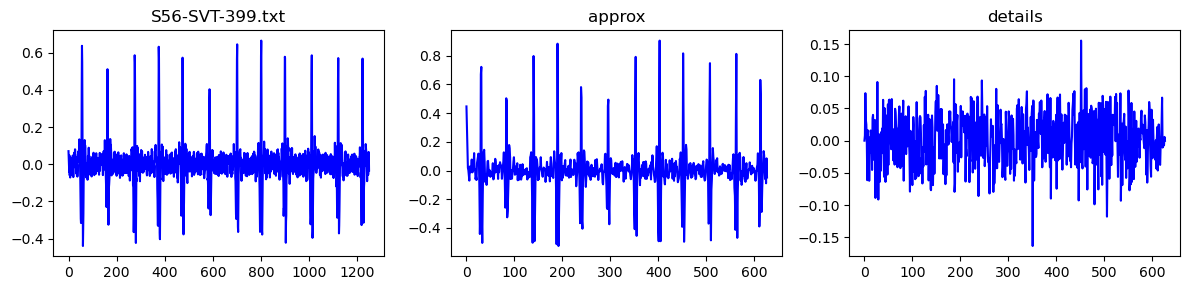

len = 6


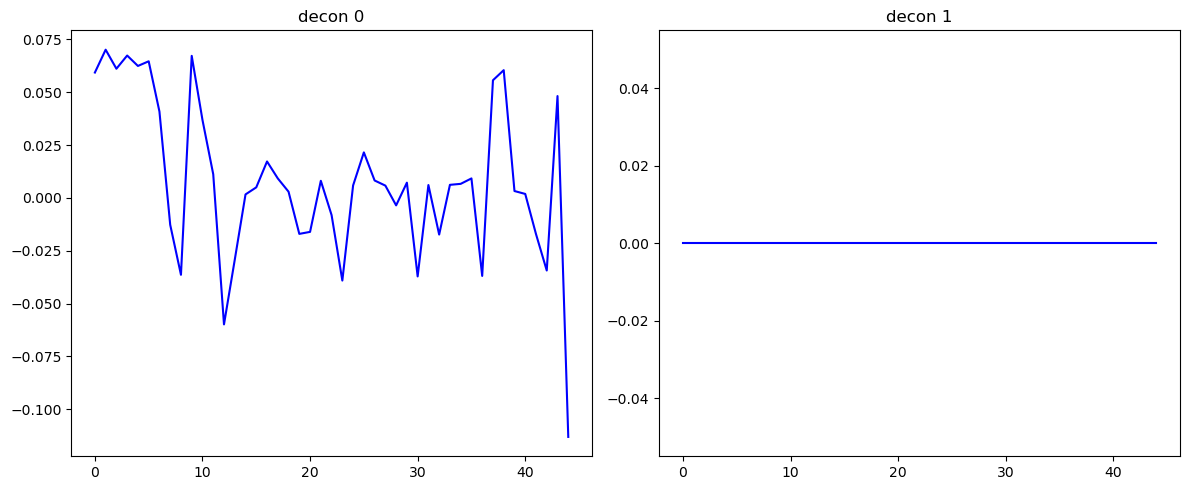

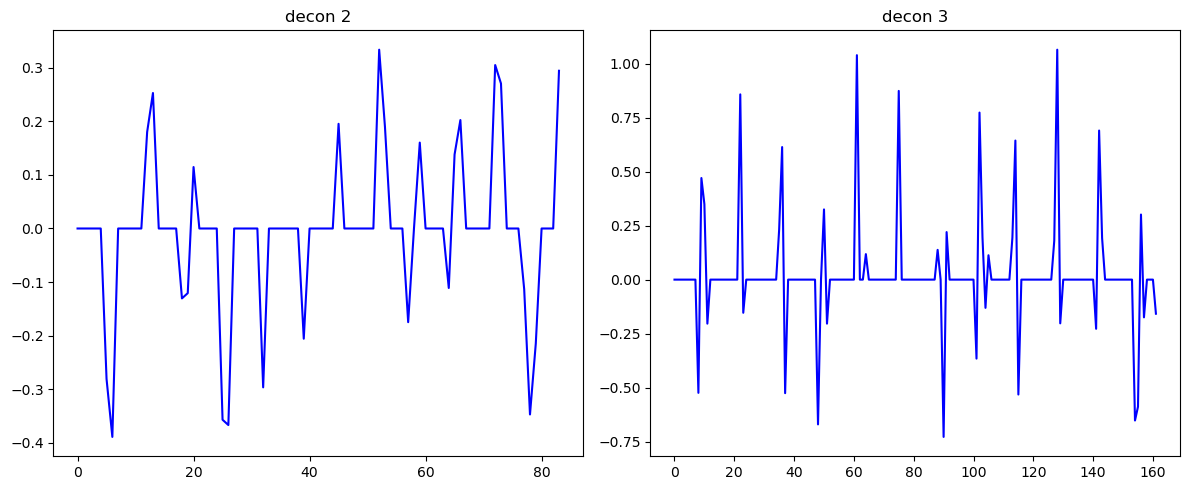

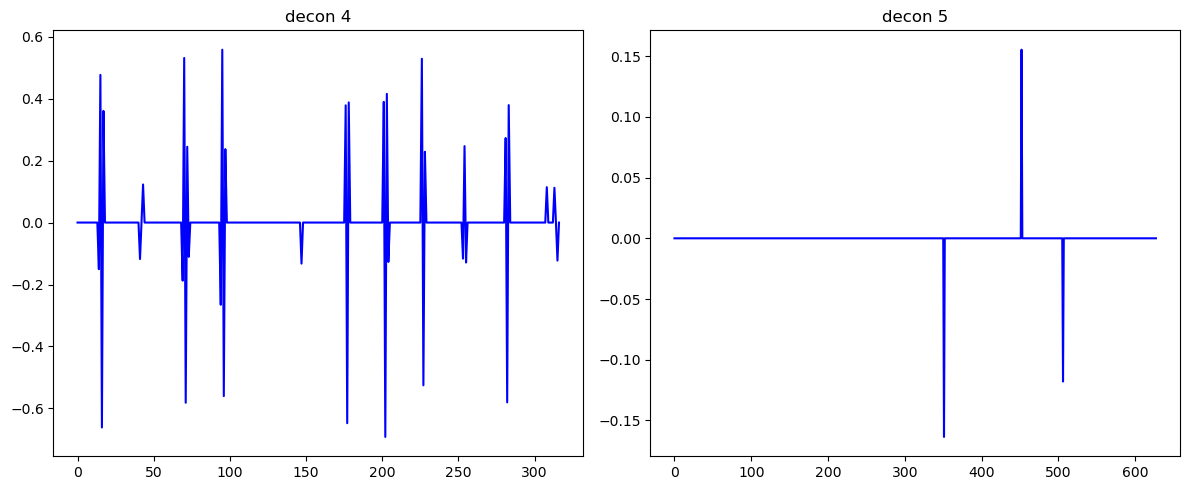

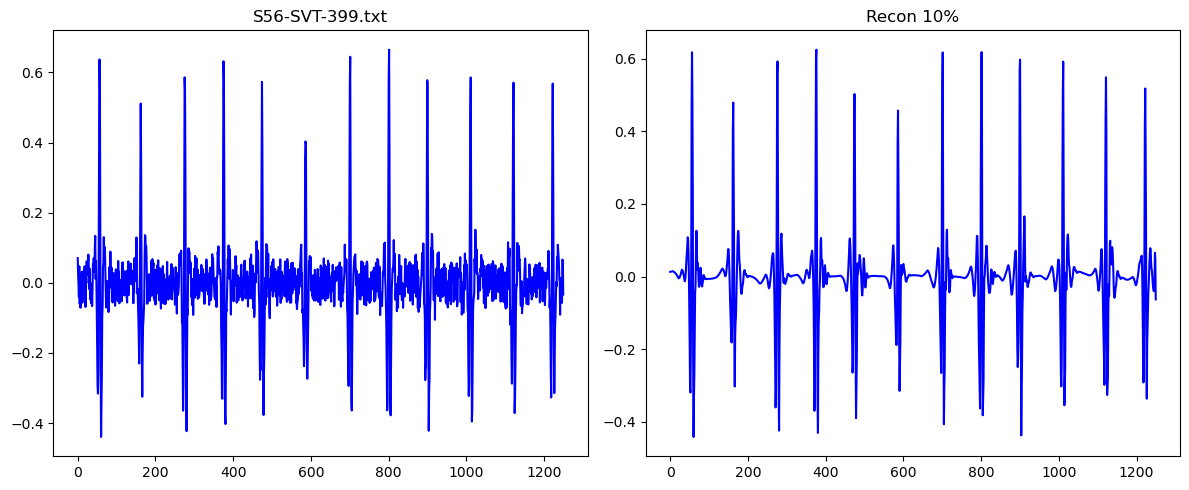

Sparsity: 88.68%
Non-zero coefficients: 145 out of 1281


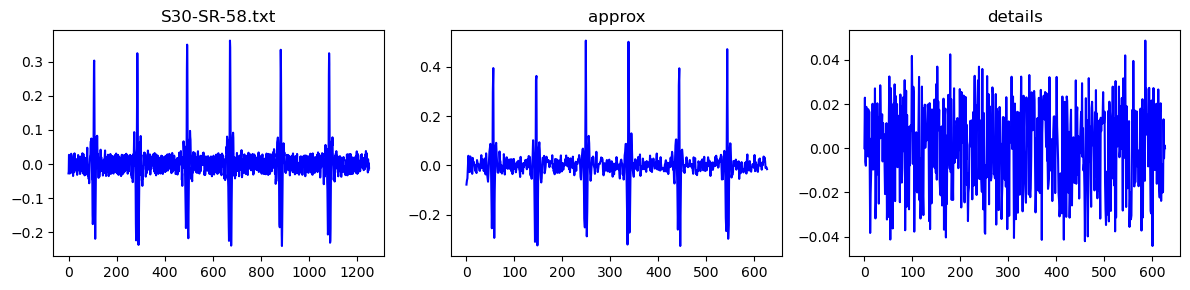

len = 6


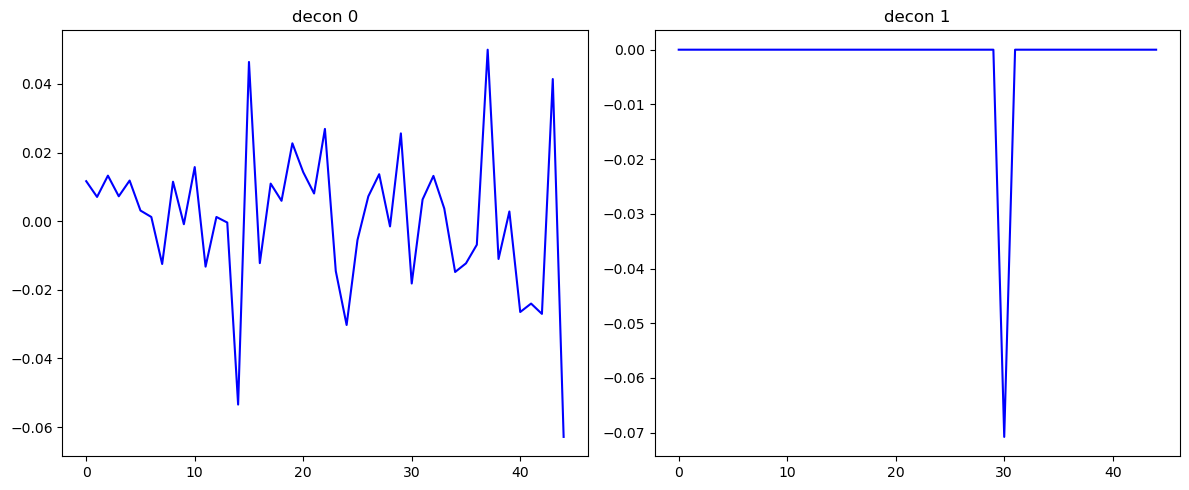

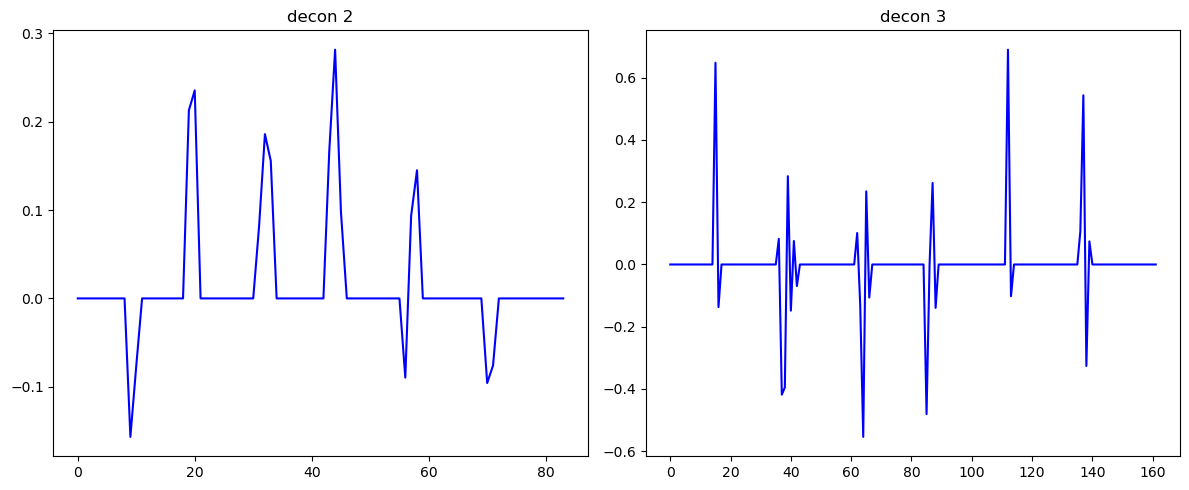

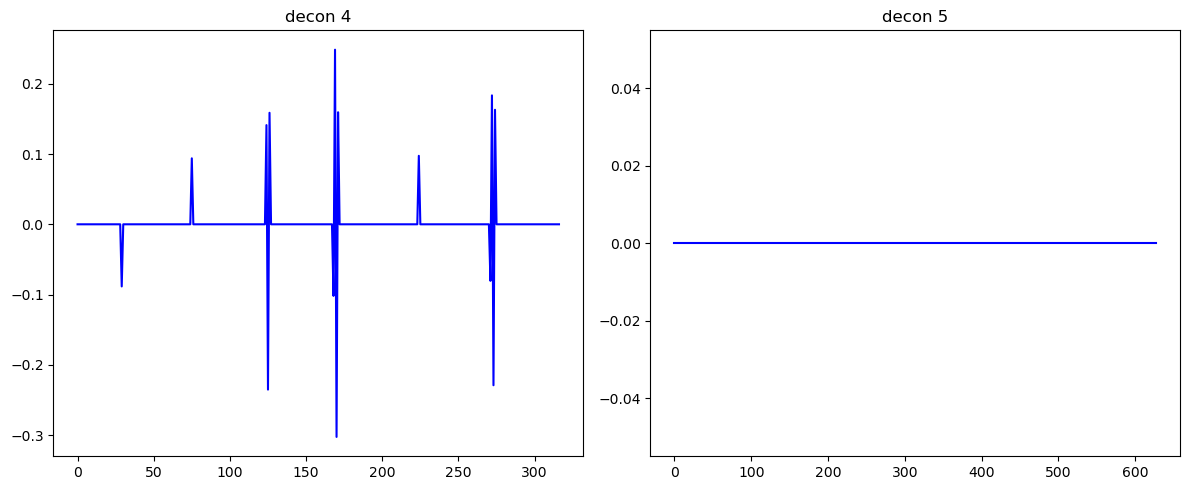

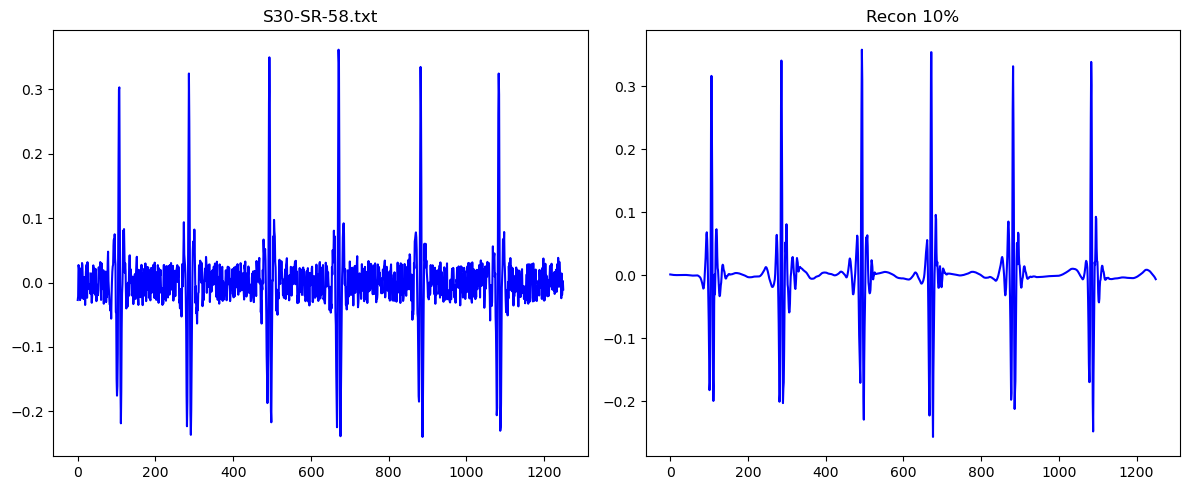

Sparsity: 92.35%
Non-zero coefficients: 98 out of 1281


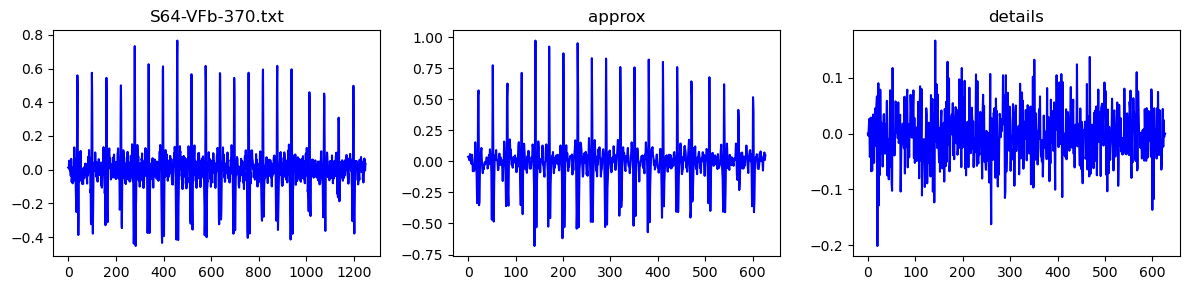

len = 6


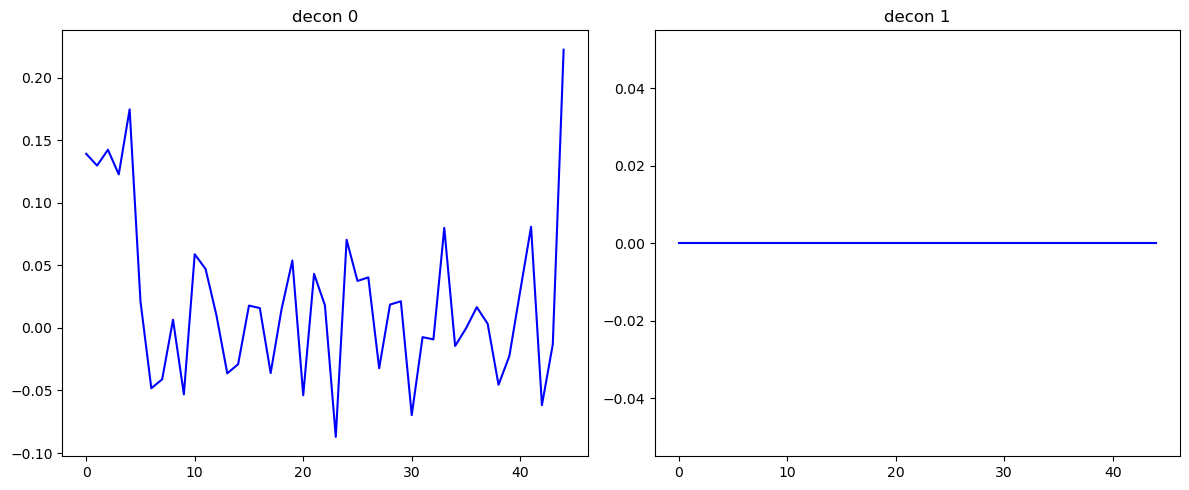

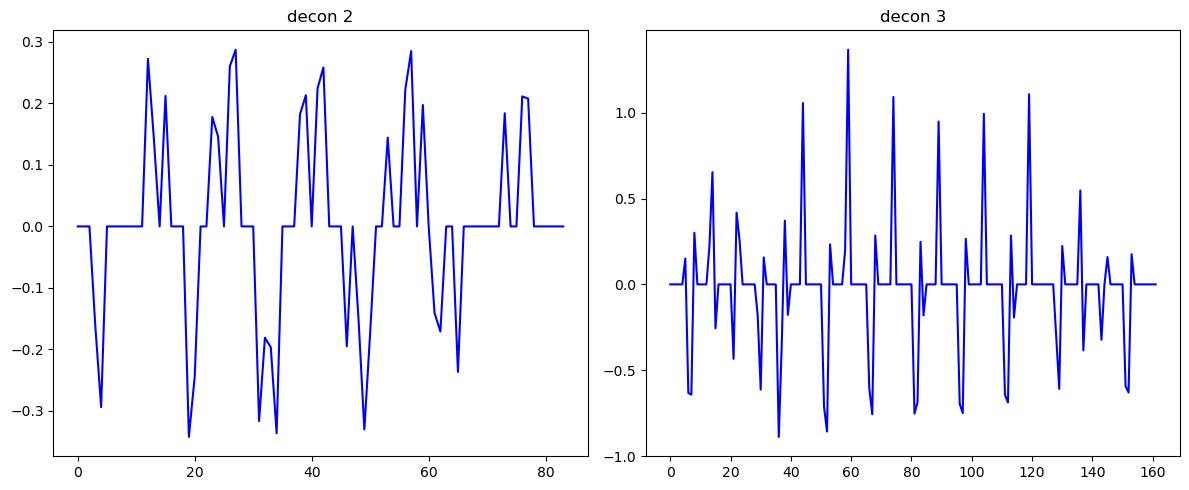

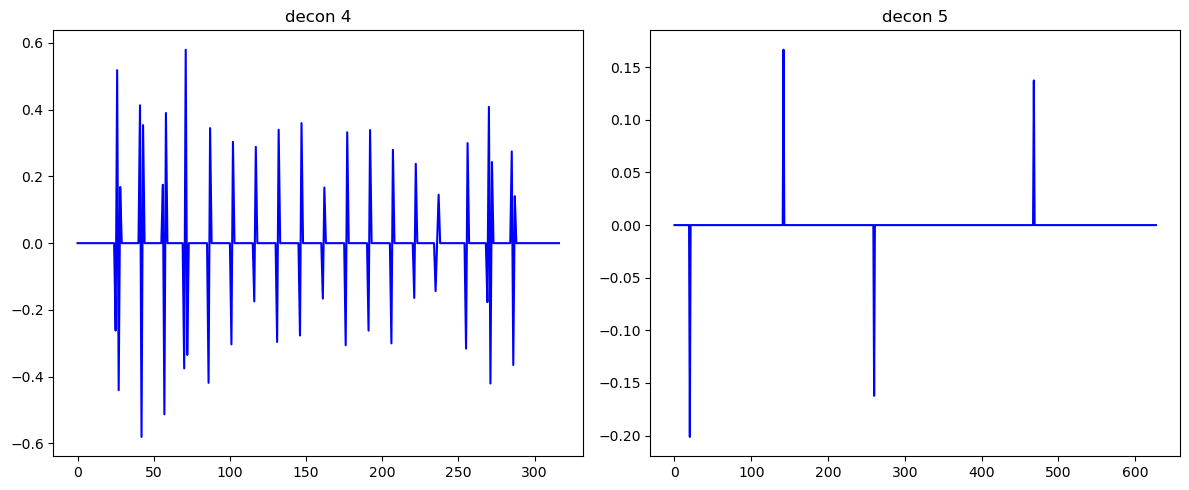

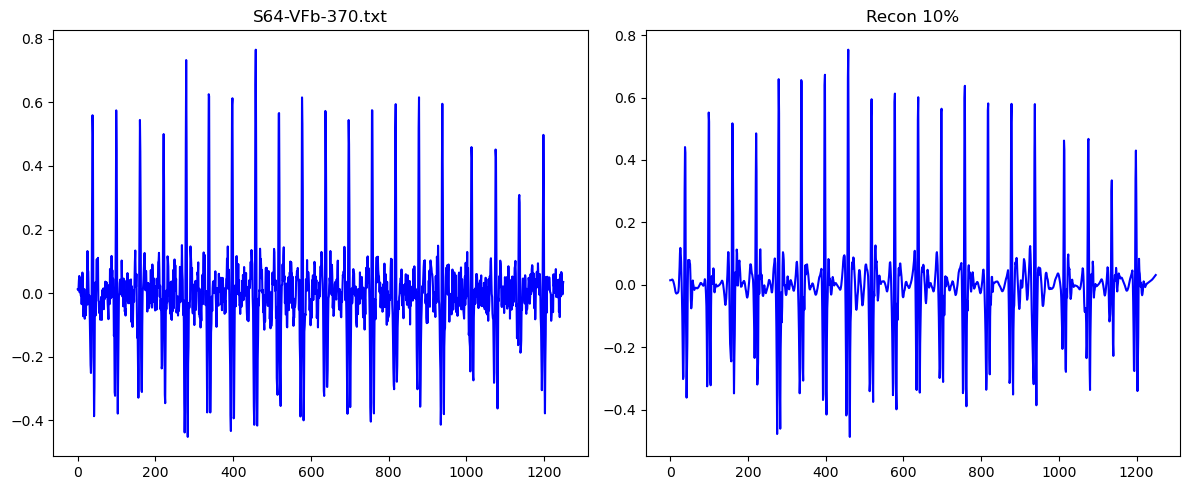

Sparsity: 86.18%
Non-zero coefficients: 177 out of 1281


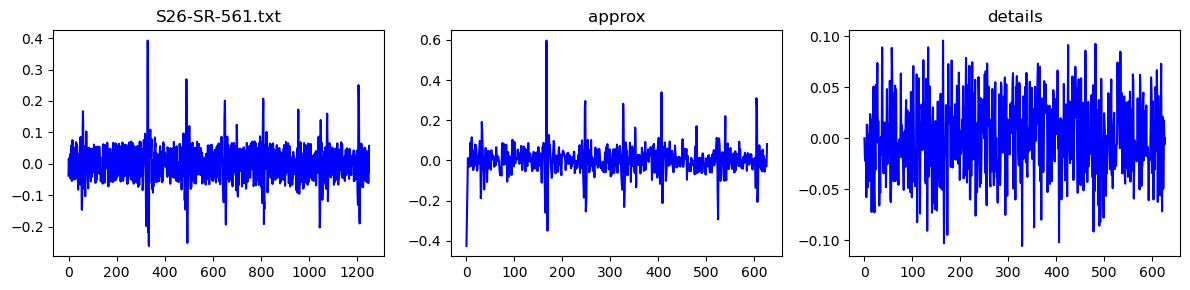

len = 6


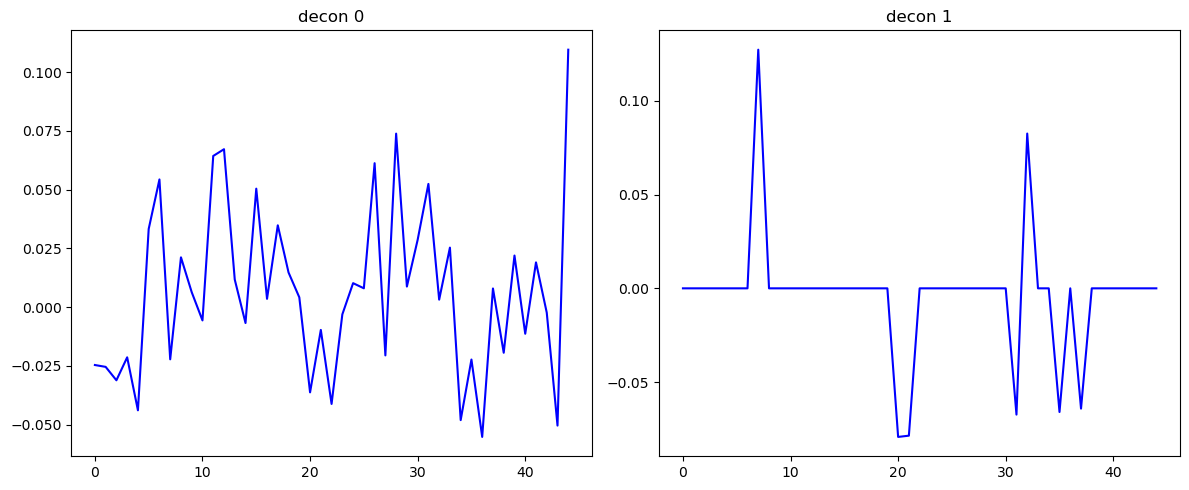

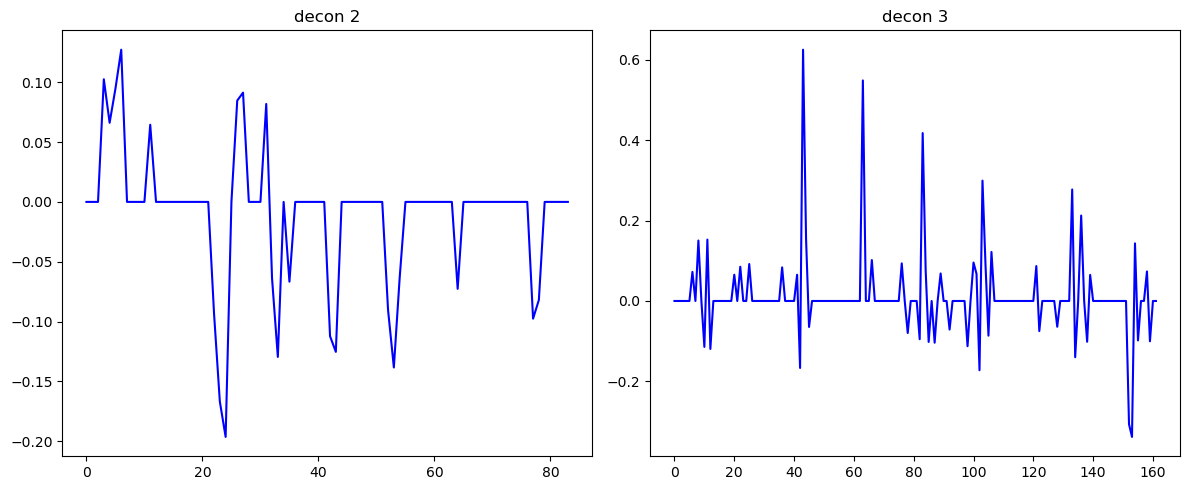

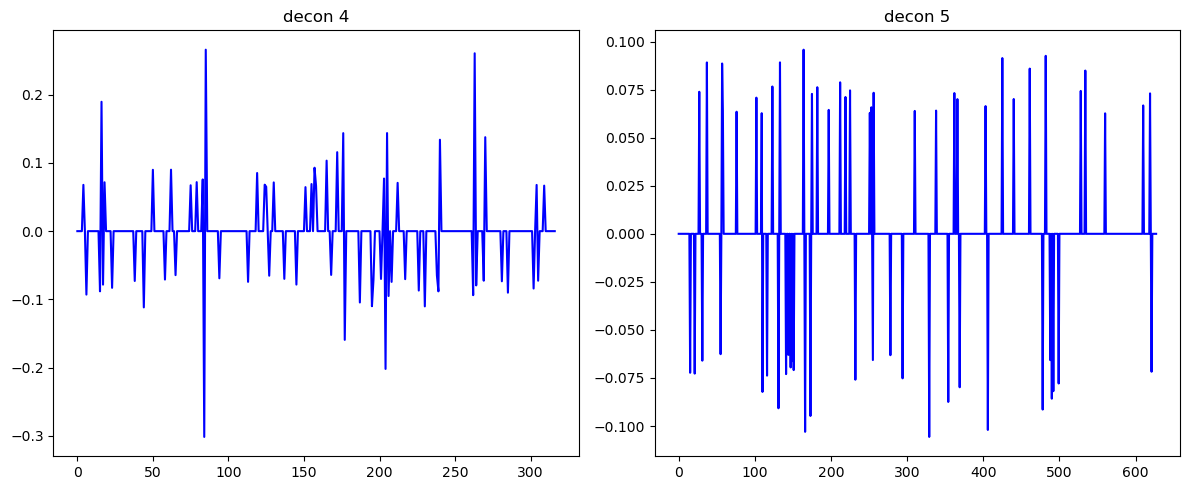

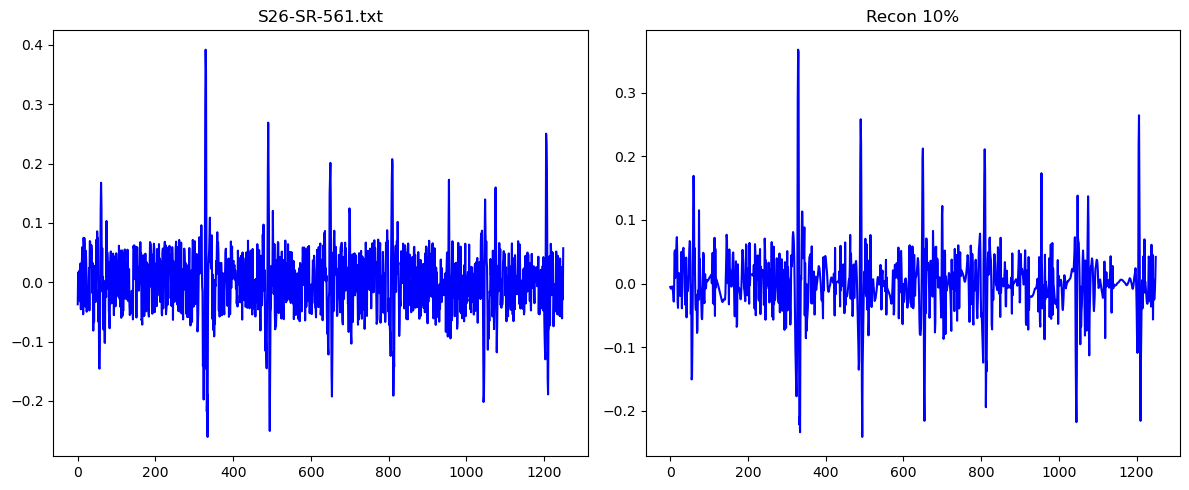

Sparsity: 80.87%
Non-zero coefficients: 245 out of 1281


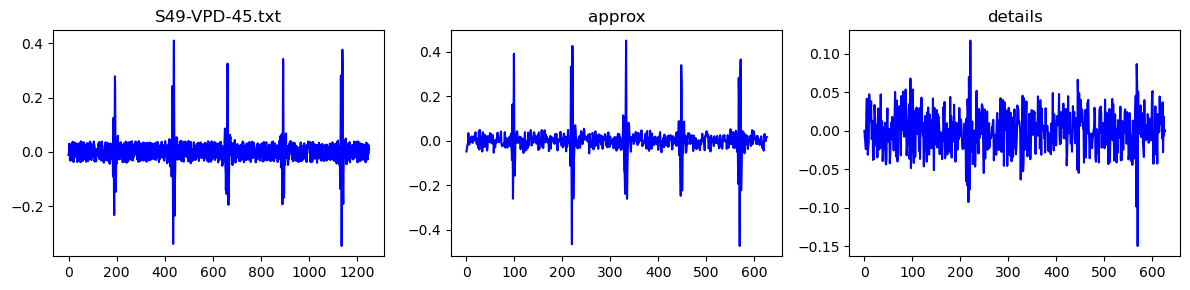

len = 6


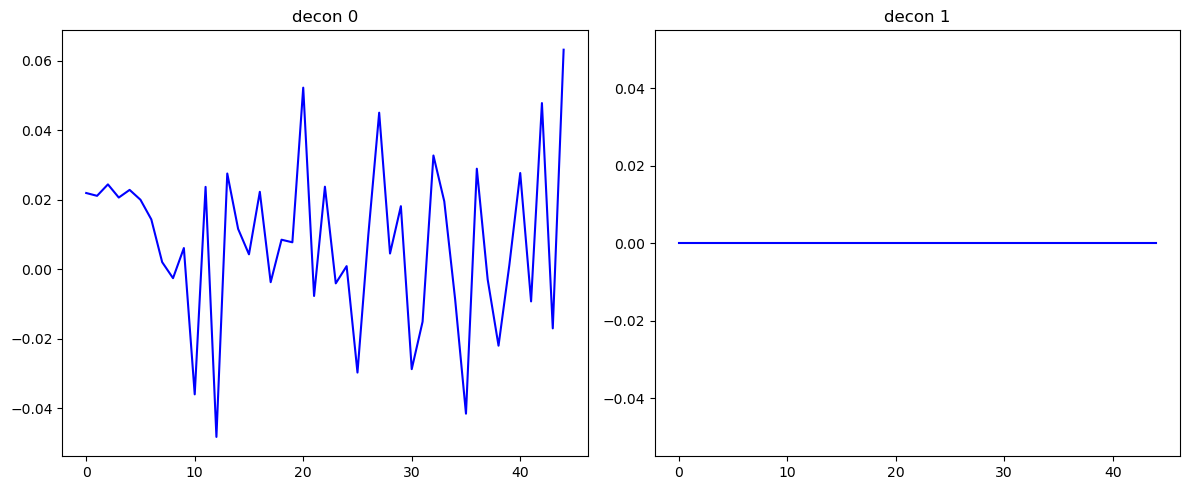

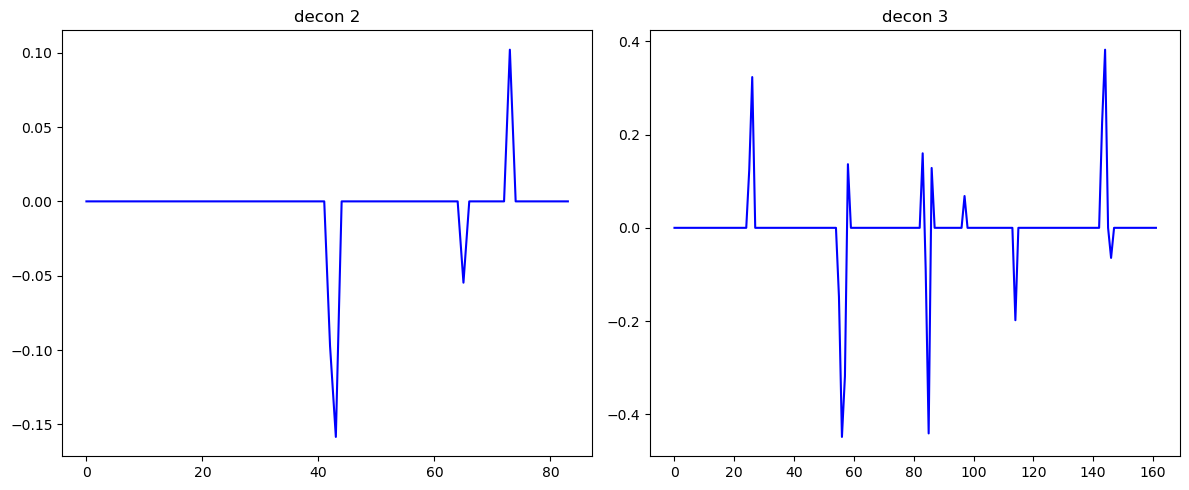

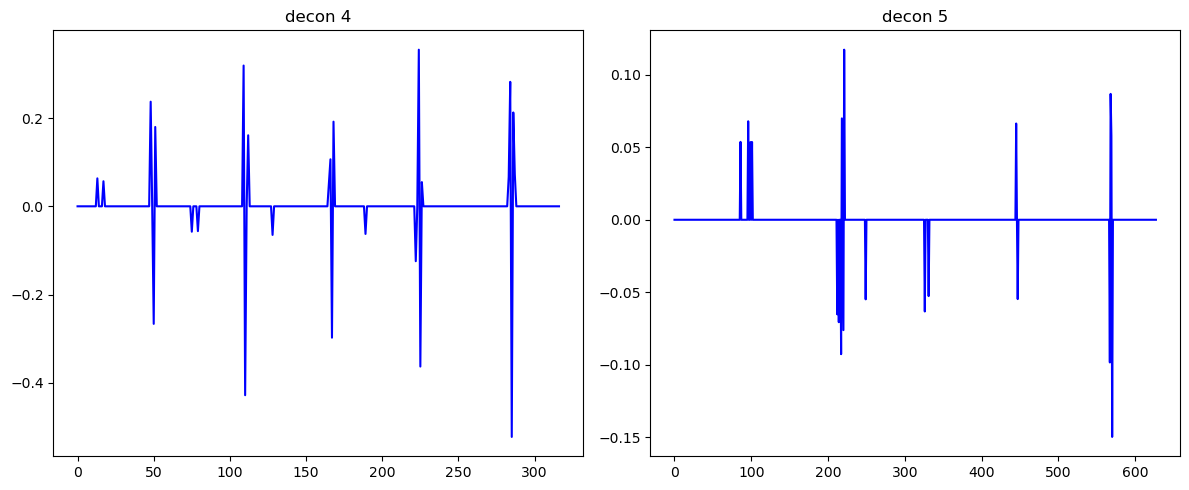

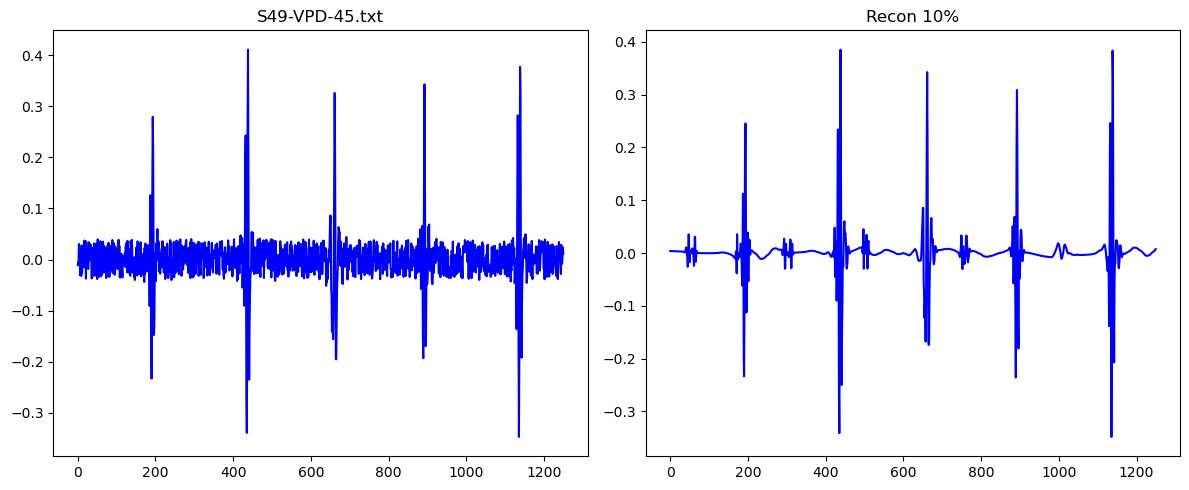

Sparsity: 91.57%
Non-zero coefficients: 108 out of 1281


In [14]:
for _ in range(5):
    idx = random.randint(0, len(directory_files))
    file_name = directory_files[idx]
    file_path = os.path.join(dir_path, file_name)
    x1 = np.loadtxt(file_path)
    
    # Usage
    thresher_maw = 10
    coeffs, reconstructed_signal = sparse_wavelet(x1, threshold_percentage=thresher_maw)
    style0 = 'b-' if file_name.split('-')[1] not in BAD else 'r-'
    
    w = pywt.Wavelet('db4')
    mode = 'smooth'
    thing = pywt.dwt(x1, w, mode)
    
    plotThreeSignals(x1, thing[0], thing[1], file_name, 'approx', 'details')

    print(f'len = {len(coeffs)}')
    for i in range(0,len(coeffs),2):
        t1 = f'decon {i}'
        t2 = f'decon {i+1}'
        plotPairSignals(coeffs[i], coeffs[i+1], title1=t1,title2=t2)
    plotPairSignals(x1, reconstructed_signal, file_name, f"Recon {thresher_maw}%")
    analyze_sparsity(coeffs)

In [15]:
### CLAUDE assisted
from collections import defaultdict
def compare_wavelet_modes(signal, wavelet='db4', level=5):
    modes = ['symmetric', 'periodic', 'smooth', 'constant', 'zero']
    results = {}
    
    for mode in modes:
        coeffs = pywt.wavedec(signal, wavelet, mode=mode, level=level)
        reconstructed = pywt.waverec(coeffs, wavelet, mode=mode)
        mse = np.mean((signal - reconstructed)**2)
        results[mode] = mse

    return results

# Assuming your_signal is your EKG data
def bestModeFinder(wavelet='db4', level=5):
    counts = defaultdict(int)
    best_performer = ('',0)
    mses = defaultdict(float)
    for fi in tqdm(directory_files, desc='Mode Finder ' + wavelet):
        file_path = os.path.join(dir_path, fi)
        signal = np.loadtxt(file_path)
        mode_comparisons = compare_wavelet_modes(signal, wavelet=wavelet, level = level)
        
        best = 1.0 # any "big" number
        best_mode = ''
        for mode, mse in mode_comparisons.items():
            mses[mode] += mse
            if mse < best:
                best = mse
                best_mode = mode
        counts[best_mode] += 1
    for mode, count in counts.items():
        if count > best_performer[1]:
            best_performer = [mode, count]
    return counts, best_performer[0], mses[best_performer[0]]
#bestModeFinder()

In [16]:
total_counts = defaultdict(int)
try_dbs = [ 'db' + str(x) for x in range (1,9)]
for wavelet in try_dbs[:]:
    counts, best_performer, mse = bestModeFinder(wavelet)
    for m, c in counts.items():
        total_counts[m] += c
    print(counts, best_performer, mse)
total_counts

Mode Finder db1: 100%|██████████████████████████████████████████████████████████| 30213/30213 [03:08<00:00, 160.32it/s]


defaultdict(<class 'int'>, {'smooth': 2511, 'symmetric': 12879, 'periodic': 10706, 'zero': 4117}) symmetric 1.0051060408568791e-28


Mode Finder db2: 100%|█████████████████████████████████████████████████████████| 30213/30213 [00:28<00:00, 1053.76it/s]


defaultdict(<class 'int'>, {'constant': 5804, 'zero': 9697, 'symmetric': 6234, 'periodic': 7035, 'smooth': 1443}) zero 4.8177857269363786e-29


Mode Finder db3: 100%|█████████████████████████████████████████████████████████| 30213/30213 [00:29<00:00, 1026.34it/s]


defaultdict(<class 'int'>, {'periodic': 7891, 'constant': 6193, 'zero': 8786, 'symmetric': 5993, 'smooth': 1350}) zero 4.842564223050476e-29


Mode Finder db4: 100%|█████████████████████████████████████████████████████████| 30213/30213 [00:29<00:00, 1027.98it/s]


defaultdict(<class 'int'>, {'zero': 8552, 'symmetric': 6638, 'periodic': 7506, 'constant': 6481, 'smooth': 1036}) zero 4.9663870803550645e-29


Mode Finder db5: 100%|██████████████████████████████████████████████████████████| 30213/30213 [00:30<00:00, 995.59it/s]


defaultdict(<class 'int'>, {'zero': 9184, 'symmetric': 6771, 'periodic': 7555, 'constant': 6335, 'smooth': 368}) zero 4.208598419471986e-29


Mode Finder db6: 100%|██████████████████████████████████████████████████████████| 30213/30213 [00:31<00:00, 961.53it/s]


defaultdict(<class 'int'>, {'periodic': 7527, 'zero': 9099, 'constant': 6355, 'symmetric': 6783, 'smooth': 449}) zero 4.7063190198352517e-29


Mode Finder db7: 100%|██████████████████████████████████████████████████████████| 30213/30213 [00:31<00:00, 951.59it/s]


defaultdict(<class 'int'>, {'periodic': 7579, 'constant': 6659, 'symmetric': 6775, 'zero': 8589, 'smooth': 611}) zero 6.734490121302049e-29


Mode Finder db8: 100%|██████████████████████████████████████████████████████████| 30213/30213 [00:33<00:00, 913.71it/s]

defaultdict(<class 'int'>, {'periodic': 7728, 'zero': 8465, 'symmetric': 6911, 'constant': 6784, 'smooth': 325}) zero 8.550531197878124e-29


defaultdict(int,
            {'smooth': 8093,
             'symmetric': 58984,
             'periodic': 63527,
             'zero': 66489,
             'constant': 44611})

In [17]:
def findBestWavelet(): #run through all modes and wavelets and shit, this was deemed overkill but we'll leave the idea/cell here
    modes = ['symmetric', 'periodic', 'smooth', 'constant', 'zero']
    wavelets = None #

    return

In [18]:
def basicDWT(w='db4', m='zero'):
     for fi in tqdm(directory_files[:5], desc="DWT"):
        data = np.loadtxt(os.path.join(dir_path,fi))
        cA, cD = pywt.dwt(data, wavelet=w, mode=m)
         
        #plotThreeSignals(data, cA, cD, title1 = fi, title2 = f'cA {w} {m}', title3 = f'cA {w} {m}', style = getStyle(fi))
         
        outName = os.path.join(r'C:\Users\jodge\Documents\School\Summer24\temp_data', fi)
        np.savetxt(outName, cA, fmt='%.7f')
        #print("DONE")

def waveletDecomp(w='db4', m='zero', l=5):
    for fi in tqdm(directory_files[:], desc=f"{w} {m} {l}"):
        data = np.loadtxt(os.path.join(dir_path,fi))
        coeffs = pywt.wavedec(signal, w, mode=m, level=l)


C:\Users\jodge\AppData\Local\Temp\ipykernel_3452\3205368996.py:49: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axs[i].set_xticklabels(comparison.keys(), rotation=45)
C:\Users\jodge\AppData\Local\Temp\ipykernel_3452\3205368996.py:49: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axs[i].set_xticklabels(comparison.keys(), rotation=45)
C:\Users\jodge\AppData\Local\Temp\ipykernel_3452\3205368996.py:49: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axs[i].set_xticklabels(comparison.keys(), rotation=45)


Wavelet: db4
  MSE: 0.000000
  Energy Retention: 1.000000
  Sparsity: 0.099922

Wavelet: db6
  MSE: 0.000000
  Energy Retention: 1.000000
  Sparsity: 0.099923

Wavelet: db8
  MSE: 0.000000
  Energy Retention: 1.000000
  Sparsity: 0.100605

Wavelet: sym4
  MSE: 0.000000
  Energy Retention: 1.000000
  Sparsity: 0.099922

Wavelet: sym6
  MSE: 0.000000
  Energy Retention: 1.000000
  Sparsity: 0.099923

Wavelet: sym8
  MSE: 0.000000
  Energy Retention: 1.000000
  Sparsity: 0.100605

Wavelet: coif3
  MSE: 0.000000
  Energy Retention: 1.000000
  Sparsity: 0.100525

Wavelet: coif4
  MSE: 0.000000
  Energy Retention: 1.000000
  Sparsity: 0.100587

Wavelet: bior3.3
  MSE: 0.000000
  Energy Retention: 1.000000
  Sparsity: 0.099922

Wavelet: bior3.5
  MSE: 0.000000
  Energy Retention: 1.000000
  Sparsity: 0.099923



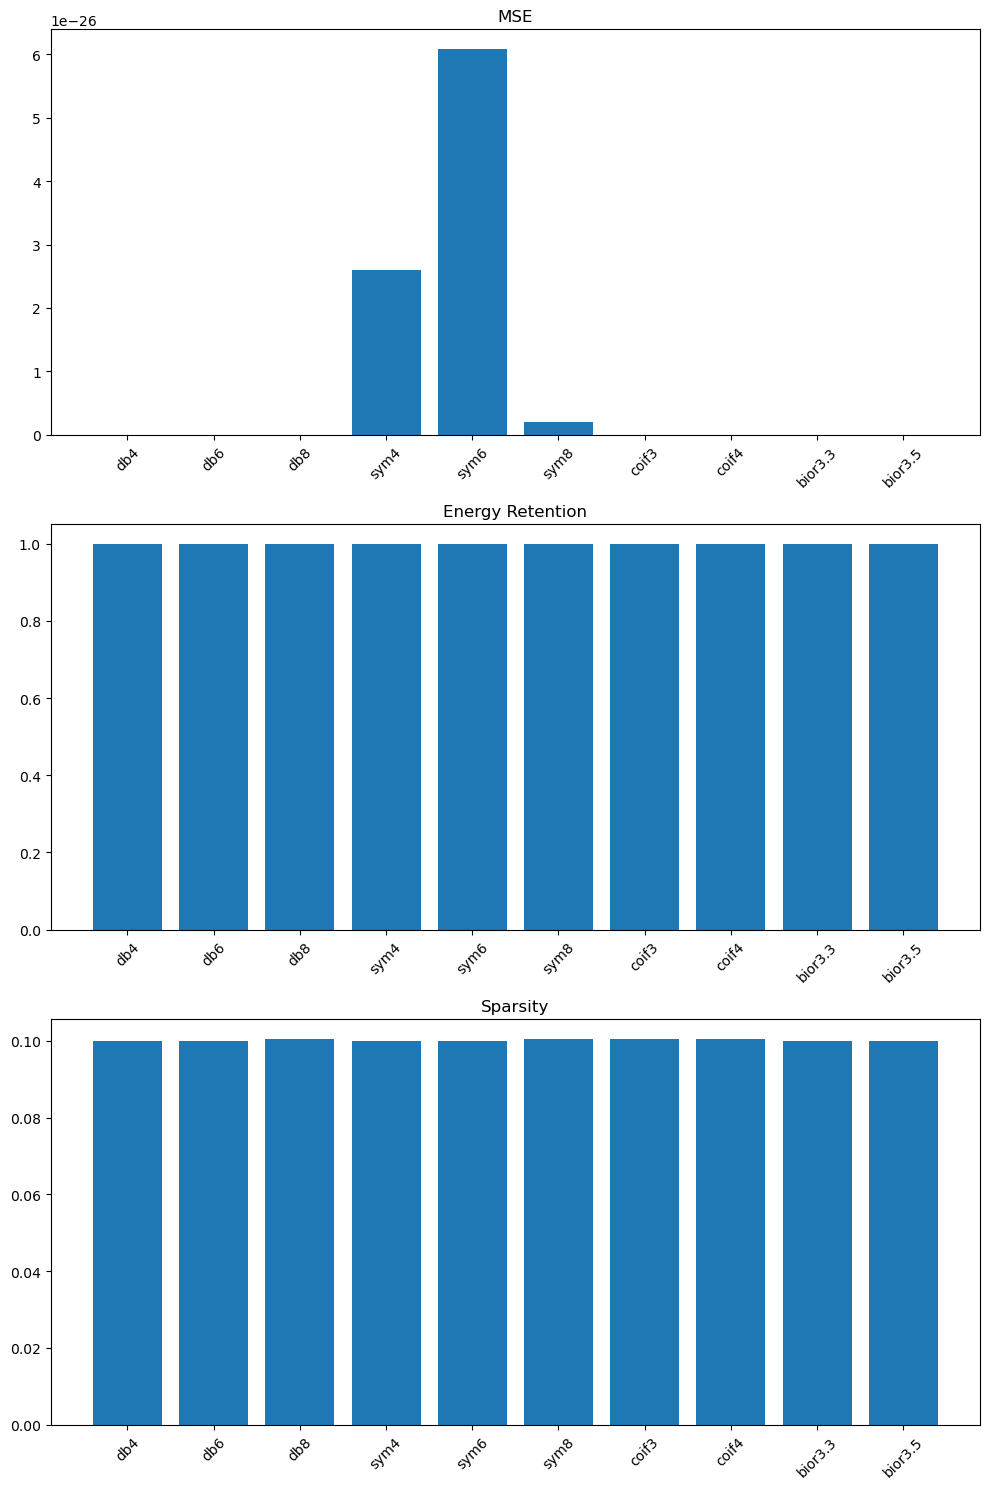

In [19]:
#full CLAUDE for reference
import pywt
import numpy as np
import matplotlib.pyplot as plt

def compare_wavelets(signal, wavelet_list, level=5):
    results = {}
    for wavelet in wavelet_list:
        # Decompose and reconstruct
        coeffs = pywt.wavedec(signal, wavelet, level=level)
        reconstructed = pywt.waverec(coeffs, wavelet)
        
        # Calculate metrics
        mse = np.mean((signal - reconstructed)**2)
        energy_retention = np.sum(reconstructed**2) / np.sum(signal**2)
        
        # Count significant coefficients (e.g., top 10% by magnitude)
        all_coeffs = np.concatenate([c.flatten() for c in coeffs])
        threshold = np.percentile(np.abs(all_coeffs), 90)
        sparsity = np.sum(np.abs(all_coeffs) > threshold) / len(all_coeffs)
        
        results[wavelet] = {
            'MSE': mse,
            'Energy Retention': energy_retention,
            'Sparsity': sparsity
        }
    return results

# List of wavelets to try
wavelet_list = ['db4', 'db6', 'db8', 'sym4', 'sym6', 'sym8', 'coif3', 'coif4', 'bior3.3', 'bior3.5']

# Assuming your_signal is your EKG data
comparison = compare_wavelets(getRandomSignal()[0], wavelet_list)

# Print results
for wavelet, metrics in comparison.items():
    print(f"Wavelet: {wavelet}")
    for metric, value in metrics.items():
        print(f"  {metric}: {value:.6f}")
    print()

# Optionally, plot the results
metrics = ['MSE', 'Energy Retention', 'Sparsity']
fig, axs = plt.subplots(len(metrics), 1, figsize=(10, 15))
for i, metric in enumerate(metrics):
    values = [results[metric] for results in comparison.values()]
    axs[i].bar(comparison.keys(), values)
    axs[i].set_title(metric)
    axs[i].set_xticklabels(comparison.keys(), rotation=45)
plt.tight_layout()
plt.show()

In [20]:
#wavelet_list = ['db4', 'db6', 'db8', 'sym4', 'sym6', 'sym8', 'coif3', 'coif4', 'bior3.3', 'bior3.5']
wavelet_list = [f'db{x}' for x in range(2,40,2)]
counts = {}
for w in wavelet_list:
    counts[w] = [0]*6
for fi in tqdm(directory_files, desc='Wavelets Compared'):
    x1 = np.loadtxt(os.path.join(dir_path,fi))    
    for wavelet in wavelet_list:
        coeffs = pywt.wavedec(x1, wavelet, mode='zero', level = 5)
        if len(coeffs) != 6:
            print(wavelet, mode)
        largest_range = 0
        idx = 0
        for i,c in enumerate(coeffs):
            pos = np.max(c)
            neg = np.min(c)
            myrange = pos - neg
            if myrange > largest_range:
                largest_range = myrange
                idx = i
        counts[wavelet][idx] += 1
"This will show which level of coefficients contributes the most to the reconstruction. It appears to always be index 3 (starting with 0).", counts

Wavelets Compared:   0%|                                                                     | 0/30213 [00:00<?, ?it/s]C:\ProgramData\anaconda3\Lib\site-packages\pywt\_multilevel.py:43: UserWarning: Level value of 5 is too high: all coefficients will experience boundary effects.
  warnings.warn(
Wavelets Compared: 100%|████████████████████████████████████████████████████████| 30213/30213 [01:33<00:00, 324.43it/s]


('This will show which level of coefficients contributes the most to the reconstruction. It appears to always be index 3 (starting with 0).',
 {'db2': [0, 0, 94, 28638, 1481, 0],
  'db4': [0, 0, 23, 28988, 1202, 0],
  'db6': [0, 0, 14, 29135, 1063, 1],
  'db8': [0, 0, 4, 29181, 1028, 0],
  'db10': [0, 0, 2, 29215, 996, 0],
  'db12': [0, 0, 3, 29214, 994, 2],
  'db14': [0, 0, 2, 29178, 1032, 1],
  'db16': [0, 0, 2, 29189, 1022, 0],
  'db18': [0, 0, 1, 29134, 1078, 0],
  'db20': [0, 0, 1, 29083, 1127, 2],
  'db22': [0, 0, 1, 29124, 1086, 2],
  'db24': [0, 0, 1, 29118, 1093, 1],
  'db26': [0, 0, 2, 29089, 1121, 1],
  'db28': [0, 0, 1, 29082, 1128, 2],
  'db30': [0, 0, 0, 29066, 1146, 1],
  'db32': [0, 0, 1, 29037, 1172, 3],
  'db34': [0, 0, 0, 29049, 1162, 2],
  'db36': [0, 0, 0, 29076, 1136, 1],
  'db38': [0, 0, 1, 29084, 1125, 3]})